**Welcome to week 2!** 

This week we'll be diving into another linear regression example, and extending it to a use case called *Multiple Linear Regression* - where you have multiple regressors that predict your dependent variable. 


To start, we'll import some necessary libraries:

In [0]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

Now that we have our libraries imported, let's load our dataset:

In [0]:
boston = load_boston()
print('Data shape: ', boston.data.shape)
print('\n\nDataset Description: ', boston.DESCR)

Data shape:  (506, 13)


Dataset Description:  .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value prop

Let's read our dataset into a dataframe (like an excel sheet but in code), and take a look at the columns we have. 

In [0]:
bos_df = pd.DataFrame(boston.data)
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Now, we'll label our dataframe columns with the actual names of the columns (instead of the number), and rename our target column to PRICE.


```bos_df.head()``` shows us the first 5 rows of our dataset. You can pass an optional parameter to see even more like this: ```bos_df.head(10)```.

In [0]:
bos_df.columns = boston.feature_names
bos_df['PRICE'] = boston.target
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's establish our X and Y variables. In this first example, we'll use LSTAT (percentage of population below a certain socioeconomic bracket) and house price.

In [0]:
X = bos_df['LSTAT']
Y = bos_df['PRICE']

Now, we can build out actual Linear Regression model using the statsmodels library. In the statsmodels basic OLS (Ordinary Least Squares) model, a y-intercept isn't included. We can add it to our model using the command ```sm.add_constant(X)```.   


(*Note: This is a different method than last week, where we used scikit-learn. This just goes to show how many different ways there are to accomplish one thing. In this case, the statsmodels method gives us easy access to a number of useful pre-calculated statistical variables*).

In [0]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           5.08e-88
Time:                        01:02:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Remember, our residuals are the distances of our predicted line from the actual x,y coordinates. Let's see how we did:

Residuals: 
0      -5.822595
1      -4.270390
2       3.974858
3       1.639304
4       6.709922
         ...    
501    -2.966864
502    -5.327393
503    -5.295563
504    -6.397521
505   -15.167452
Length: 506, dtype: float64




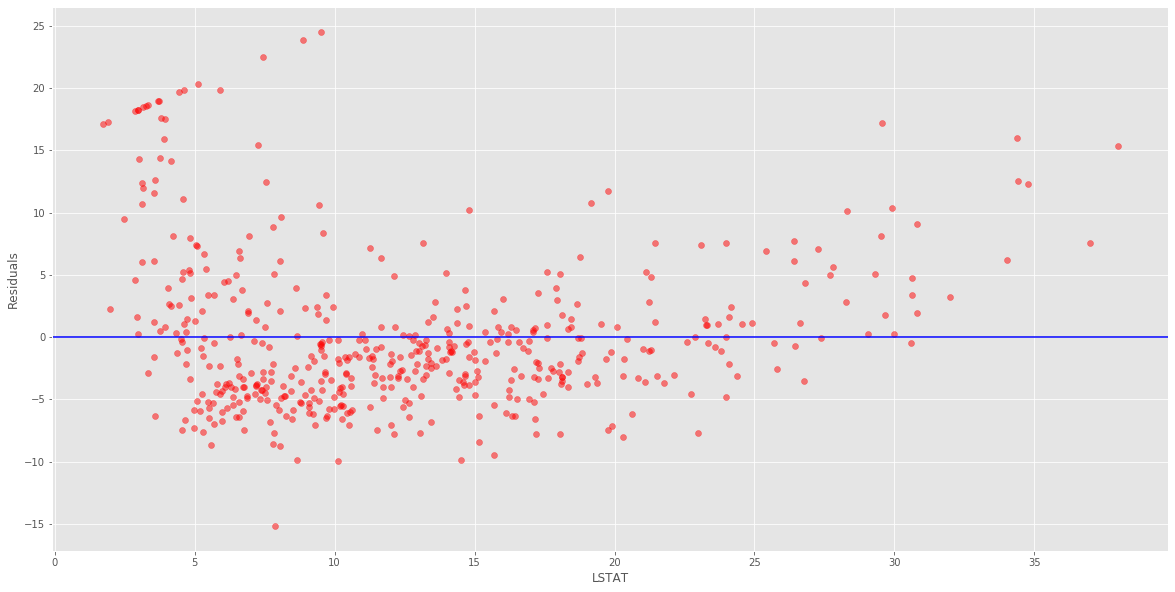

In [0]:
residuals = results.resid
print('Residuals: \n' + str(residuals) + '\n\n')

fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(bos_df['LSTAT'], residuals, color='red', alpha=0.5)
plt.xlabel('LSTAT')
plt.ylabel('Residuals')
plt.axhline(y=0, color='b', linestyle='-')

That's the shape of our residuals (how our regression line deviates from our dataset). Let's see how our predicted OLS line fits the actual data. What are some observations?

Text(0, 0.5, 'PRICE (in units of $1000)')

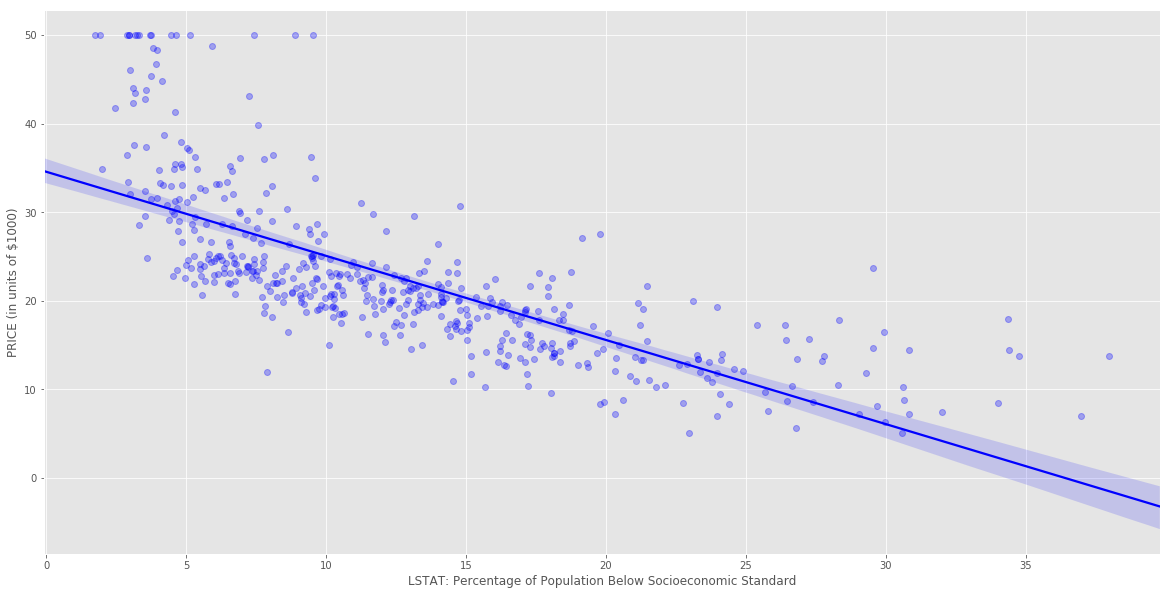

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
sns.regplot(bos_df['LSTAT'], Y, color='blue', scatter_kws={'alpha':0.3})
plt.xlabel('LSTAT: Percentage of Population Below Socioeconomic Standard')
plt.ylabel('PRICE (in units of $1000)')

Let's create a heatmap / correlation matrix to see if we can find any other correlations that may be interesting!

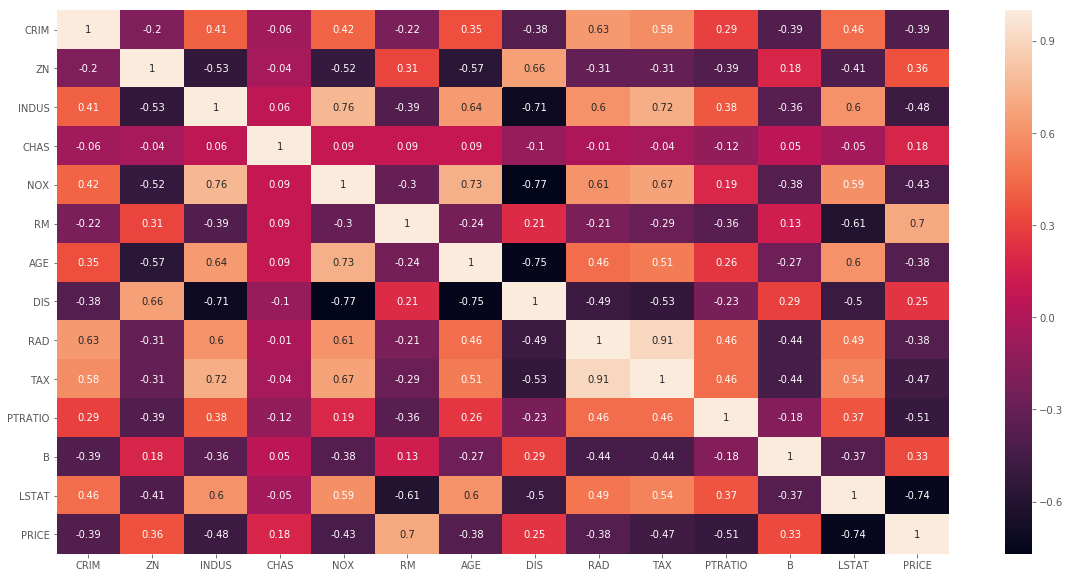

In [0]:
correlation_matrix = bos_df.corr().round(2)
fig, ax = plt.subplots(figsize=(20,10))   
sns.heatmap(data=correlation_matrix, annot=True)

In [0]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In order to run Multiple Regression (or Polynomial Regression), we'll need to concatenate our variables together to form a single X matrix.

In [0]:
X = bos_df[['NOX', 'ZN','CRIM']]
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              953.3
Date:                Mon, 28 Oct 2019   Prob (F-statistic):                   4.94e-207
Time:                        22:16:32   Log-Likelihood:                         -1852.4
No. Observations:                 506   AIC:                                      3711.
Df Residuals:                     503   BIC:                                      3723.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Now, we're going to avoid visualizing these results for now. Why? Because we have 3 X variables and our Y variable, that would mean plotting something in four dimensions. Generally, past three dimensions gets a bit hairy. We'll likely be talking about more sophisticated methods of plotting later on. But, because that's not the focus of today's lesson, we'll need to rely on pure analytical interpretations. Sorry :( 


---



To start analysing our results, let's look at the VIF, or Variance Inflation Factor for each value. This will give us an indication of multicolinearity. Multicolinearity, simply put, says that there is correlation between two or more variables in our regression model.

Remember, our model looks like:

\begin{equation}
y = B_0 + B_1x_1 + B_2x_2  + ... + B_nx_n
\end{equation}

Every Beta term should be independent.

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.472757,NOX
1,1.162843,ZN
2,1.308226,CRIM


So that looks good! But, if we look closer, we'll find that there's something wrong with our results. 

Our model appears to be suffering from something called "Autocorelation"! Autocorrelation is the correlation among the residuals. 

If we look at our model summary above, the high (and ominous) .666 value for our Derbin-Watson test indicates positive autocorelation (any value below 2 is positive autocorrelation, while any value above 2 is negative autocorrelation --> less than 1 or greater than 3 is cause for alarm)

In [0]:
X = bos_df[['TAX', 'RAD','CHAS']]
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              503.2
Date:                Wed, 30 Oct 2019   Prob (F-statistic):                   5.42e-151
Time:                        01:19:16   Log-Likelihood:                         -1982.2
No. Observations:                 506   AIC:                                      3970.
Df Residuals:                     503   BIC:                                      3983.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,6.426691,TAX
1,6.313655,RAD
2,1.059082,CHAS


In [0]:
X = bos_df[['TAX','CHAS']]
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              445.3
Date:                Tue, 29 Oct 2019   Prob (F-statistic):                   4.07e-112
Time:                        22:19:51   Log-Likelihood:                         -2075.6
No. Observations:                 506   AIC:                                      4155.
Df Residuals:                     504   BIC:                                      4164.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------